In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
da = pd.read_csv('jobs_1.csv')
ba = pd.read_csv('jobs_2.csv')
ds = pd.read_csv('jobs_3.csv')
de = pd.read_csv('jobs_4.csv')
ds_main = pd.concat([da,ba,ds,de],ignore_index=True)

In [3]:
ds_main = ds_main.drop(['unique_id','link','date'],axis=1)

In [4]:
ds_main.head(5)

,Unnamed: 0,city,job_qry,job_title,company_name,location,summary,salary
0,1,New+York,data+analyst,Health Care Data Analyst,UBMD Pediatrics,NOT_FOUND,"Health Care Data Analyst. Collect, compile and...",NOT_FOUND
1,2,New+York,data+analyst,Customer Service Analyst,Bloomberg,NOT_FOUND,A knack for data. Familiarity with combining a...,NOT_FOUND
2,3,New+York,data+analyst,Administrative Analyst,Anonymous Content,NOT_FOUND,Financial firm in NYC is seeking an Administra...,"\n $40,000 - $60,000 a year"
3,4,New+York,data+analyst,Data Analyst,Sandhill Investment Management,NOT_FOUND,"Perform data loads, data extracts and conversi...",NOT_FOUND
4,5,New+York,data+analyst,Data Analyst,New York State Psychiatry Institute,"New York, NY 10032 (Washington Heights area)",We are looking a full-time data analyst to ass...,"\n $65,710 a year"


In [5]:
ds_main2 = ds_main

In [6]:
ds_main2 = ds_main2[ds_main2.salary != 'NOT_FOUND']
ds_main2 = ds_main2[ds_main2.location != 'NOT_FOUND']

In [7]:
ds_main2

,Unnamed: 0,city,job_qry,job_title,company_name,location,summary,salary
4,5,New+York,data+analyst,Data Analyst,New York State Psychiatry Institute,"New York, NY 10032 (Washington Heights area)",We are looking a full-time data analyst to ass...,"\n $65,710 a year"
8,9,New+York,data+analyst,DATA ANALYST,Long Island FQHC Inc,"Westbury, NY 11590","Health Care Quality Data Analyst. Claims, prov...","\n $50,000 - $65,000 a year"
22,23,New+York,data+analyst,Data Analyst,New York State Psychiatry Institute,"New York, NY 10032 (Washington Heights area)",We are looking a full-time data analyst to ass...,"\n $65,710 a year"
38,39,New+York,data+analyst,jr-mid level Business Analyst/Data Analyst,Wework Solutions Inc,"Manhattan, NY",Business Analyst/Data Analyst. Developing data...,\n $38 - $40 an hour
54,55,New+York,data+analyst,Entry Level Financial Analyst,Precise - Int,"New York, NY",Mapping and analyzing quantitative data. The a...,"\n $51,000 a year"
56,57,New+York,data+analyst,POLICY ANALYST,New York City HRA/DEPT OF SOCIAL SERVICES,"Manhattan, NY","Experience in performance reporting, process i...","\n $52,524 - $60,403 a year"
60,61,New+York,data+analyst,Data Analyst / Data Scientist,Defined Clarity,"New York, NY",Call Center or Customer care data experience a...,\n $65 - $75 an hour
61,62,New+York,data+analyst,Policy Analyst,New York City DISTRICT ATTORNEY KINGS COUNTY,"Brooklyn, NY 11201","In this position, the Policy Analyst will be r...","\n $60,000 - $80,000 a year"
71,72,New+York,data+analyst,Marketing Data Analyst,SREYO LLC,"New York, NY 10016 (Gramercy area)",We are really looking for someone with 3 years...,"\n $75,000 - $83,000 a year"
82,83,New+York,data+analyst,Data Analyst / Data Scientist,Defined Clarity,"New York, NY",We have a client that is looking for a data sc...,\n $65 - $75 an hour


## Analysing Job Summary

In [8]:
import nltk, re, string
from nltk.corpus import stopwords
# library for normalization
from sklearn.preprocessing import normalize
from wordcloud import WordCloud
from textblob import Word
# numpy is the package for matrix caculation
import numpy as np  
import pprint

In [9]:
summary=ds_main2['summary']

In [10]:
summary.head()

4     We are looking a full-time data analyst to ass...
8     Health Care Quality Data Analyst. Claims, prov...
22    We are looking a full-time data analyst to ass...
38    Business Analyst/Data Analyst. Developing data...
54    Mapping and analyzing quantitative data. The a...
Name: summary, dtype: object

In [11]:
docs=(summary.tolist())
len(docs)
#Removing stopwords
stop_words = stopwords.words('english')
#morewords=['help','still','take','mg','susbstance','work','turky']
#stop_words.extend(morewords)

In [12]:
def get_doc_tokens(doc):
    tokens=[token.strip() \
            for token in nltk.word_tokenize(doc.lower()) \
            if token.strip() not in stop_words and\
               token.strip() not in string.punctuation]
    
    # you can add bigrams, collocations, or lemmatization here
    
    # create token count dictionary
    token_count=nltk.FreqDist(tokens)
    
    # or you can create dictionary by yourself
    #token_count={token:tokens.count(token) for token in set(tokens)}
    tt = token_count.most_common()
    print(type(token_count))
    #print(get_doc_tokens(doc))
    return token_count
    #print(token_count)

# step 2. process all documents to 
# a dictionary of dictionaries
docs_tokens={idx:get_doc_tokens(doc) \
             for idx,doc in enumerate(docs)}
#print(docs_tokens)

<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.FreqDist'>
<class 'nltk.probability.Fre

In [13]:
dtm=pd.DataFrame.from_dict(docs_tokens, orient="index" )
dtm=dtm.fillna(0)
len(dtm)

172

In [14]:
tf=dtm.values

# sum the value of each row
doc_len=tf.sum(axis=1)
#print(doc_len)

# divide dtm matrix by the doc length matrix
tf=np.divide(tf, doc_len[:,None])
print(tf)

[[0.08333333 0.08333333 0.08333333 ... 0.         0.         0.        ]
 [0.         0.         0.23529412 ... 0.         0.         0.        ]
 [0.08333333 0.08333333 0.08333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.05555556 ... 0.         0.         0.        ]
 [0.         0.         0.26315789 ... 0.         0.         0.        ]
 [0.         0.         0.06666667 ... 0.06666667 0.06666667 0.06666667]]


In [15]:
#Getting Inverse Document Frequency
df=np.where(tf>0,1,0)
#df
idf=np.log(np.divide(len(docs), \
        np.sum(df, axis=0)))+1
print("\n-------IDF Matrix-------")
print (idf)


smoothed_idf=np.log(np.divide(len(docs)+1, np.sum(df, axis=0)+1))+1
print("\n-------Smoothed IDF Matrix-------")
print(smoothed_idf)



-------IDF Matrix-------
[3.31428113 5.4543473  1.51276549 2.21566884 5.4543473  4.20158433
 4.76120012 4.53805656 4.76120012 5.4543473  5.4543473  1.
 4.53805656 5.04888219 4.35573501 5.4543473  6.14749448 4.76120012
 5.04888219 6.14749448 5.04888219 5.04888219 3.9502699  2.10444321
 5.4543473  4.76120012 4.76120012 3.58254512 4.06805294 5.04888219
 6.14749448 4.35573501 5.4543473  5.4543473  4.53805656 5.04888219
 3.66258783 6.14749448 4.76120012 3.1517622  6.14749448 6.14749448
 4.06805294 2.59214642 5.04888219 4.20158433 6.14749448 3.9502699
 4.53805656 5.04888219 6.14749448 6.14749448 6.14749448 6.14749448
 4.76120012 5.4543473  5.4543473  4.53805656 5.4543473  4.76120012
 4.06805294 6.14749448 3.10297204 4.76120012 6.14749448 5.04888219
 6.14749448 6.14749448 4.35573501 3.50843715 5.4543473  5.4543473
 5.4543473  6.14749448 6.14749448 4.06805294 3.10297204 5.4543473
 3.01200026 6.14749448 6.14749448 5.04888219 5.04888219 6.14749448
 4.76120012 5.04888219 5.04888219 5.04888219 4.

In [16]:
#Calculating TF-IDF
print("\n\t\t-------TF-IDF Matrix-------")
tf_idf=normalize(tf*idf)
print(tf_idf)

print("\n\t\t-------Smoothed TF-IDF Matrix-------")
smoothed_tf_idf=normalize(tf*smoothed_idf)
print(smoothed_tf_idf)
len(tf)


		-------TF-IDF Matrix-------
[[0.22255678 0.36626404 0.10158348 ... 0.         0.         0.        ]
 [0.         0.         0.33428592 ... 0.         0.         0.        ]
 [0.22255678 0.36626404 0.10158348 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.06708479 ... 0.         0.         0.        ]
 [0.         0.         0.39127369 ... 0.         0.         0.        ]
 [0.         0.         0.0751755  ... 0.30549414 0.30549414 0.30549414]]

		-------Smoothed TF-IDF Matrix-------
[[0.23195357 0.35932569 0.10726433 ... 0.         0.         0.        ]
 [0.         0.         0.35408702 ... 0.         0.         0.        ]
 [0.23195357 0.35932569 0.10726433 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.073643   ... 0.         0.         0.        ]
 [0.         0.         0.41253545 ... 0.         0.         0.        ]
 [0.         0.         0.08216125 ... 0.29731066 0.29731066 0.29731066]]


172

In [17]:
#Obtaining top 5 words in each doc by tfidf weight
top=smoothed_tf_idf.argsort()[:,::-1][:,0:10]
#top
top5=[]
for row in top:
    s=([dtm.columns[x] for x in row])
    top5.append(s)


In [18]:
#Adding new column to the df with top 5 words 
ds_main2=ds_main2[0:172]
ds_main2['top5']=top5            
#df3['top5'].head()
ds_main2['top5'].head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


4     [neuroscience/psychology, full-time, assist, d...
8     [data, hedis/qarr, provider, claims, care, ext...
22    [neuroscience/psychology, full-time, assist, d...
38    [purchasing, analyst/data, departments, financ...
54    [facets, providing, regarding, mapping, quanti...
Name: top5, dtype: object

In [19]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
jlist=list(itertools.chain.from_iterable(ds_main2['top5']))
jlist=" ".join(jlist)

In [21]:
wordcloudm = WordCloud(background_color="white",colormap="viridis").generate(jlist)

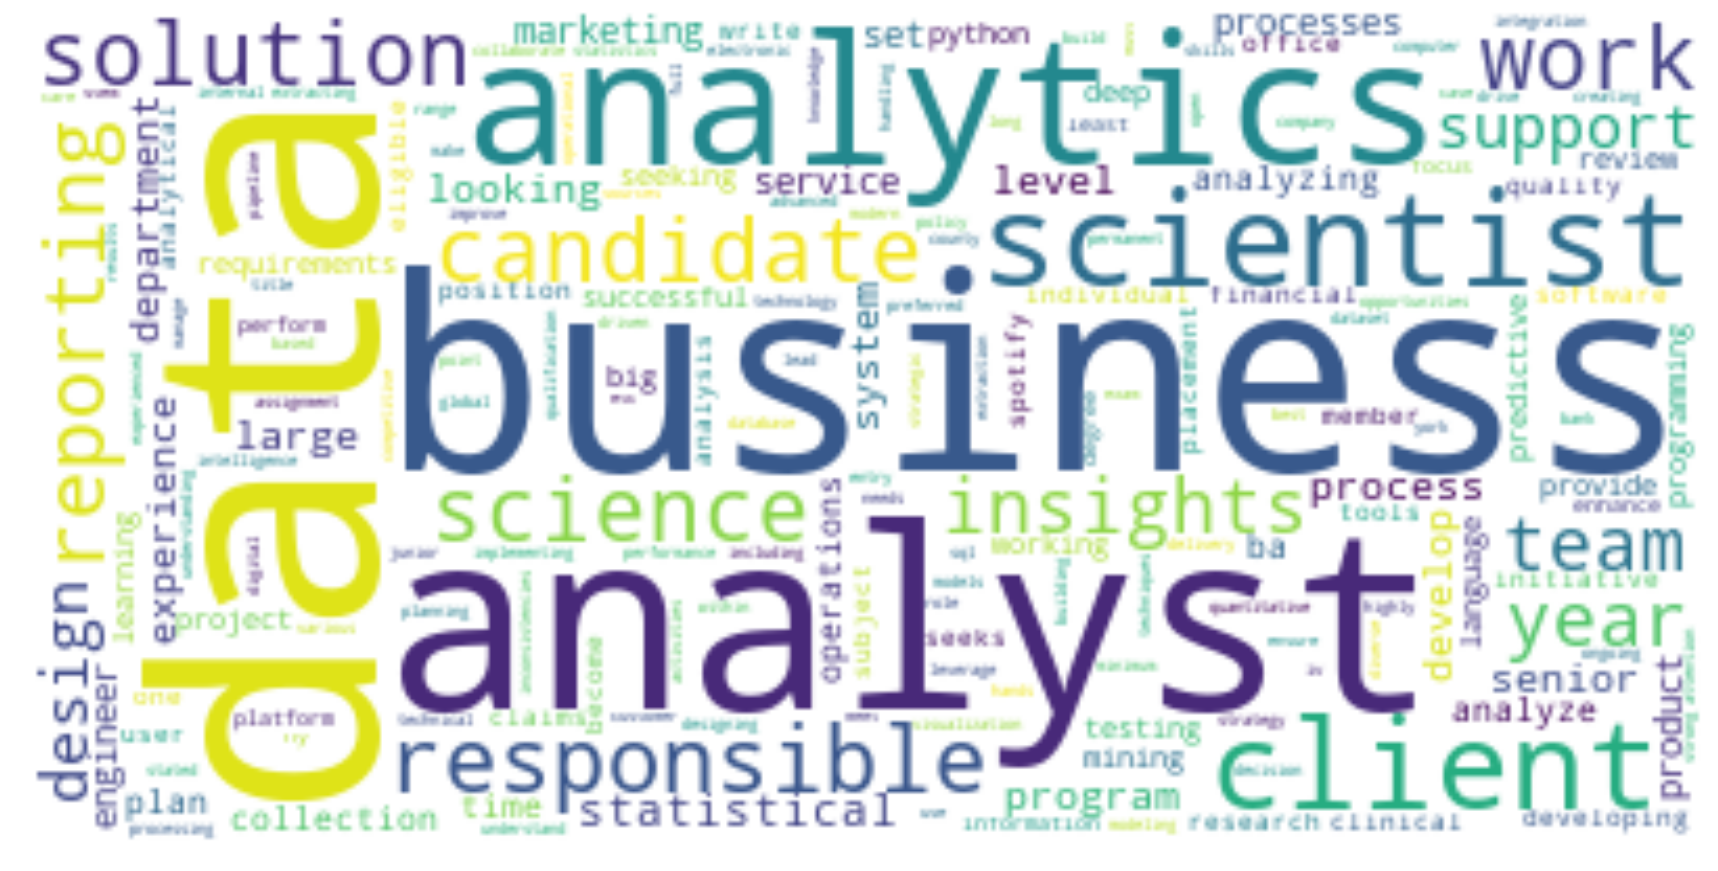

In [22]:
plt.figure(figsize = (30,30))
plt.imshow(wordcloudm,interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
total_no_company=ds_main['company_name'].nunique()
print('Toatl number of firms with data science job vacancies',total_no_company)

Toatl number of firms with data science job vacancies 455


In [24]:
ds_main.drop_duplicates(subset=['job_Title','company_name','summary'],inplace = True)
most_vacancy= ds_main.groupby(['company_name'])['job_title'].count()
most_vacancy=most_vacancy.reset_index(name='position')
most_vacancy=most_vacancy.sort_values(['position'],ascending=False)
pareto_df=most_vacancy
most_vacancy=most_vacancy.head(25)
print('Top 10 firms with most vacancies',most_vacancy)

Top 10 firms with most vacancies                                   company_name  position
359                                    Spotify        19
169                                     Google        11
255                               NBCUniversal        10
251                             Morgan Stanley         9
298                           Northwell Health         7
202                            JP Morgan Chase         7
314                                    PepsiCo         7
260                         NYU Langone Health         6
44                             Bank of America         6
413                                    Verizon         6
55                                   Bloomberg         5
425                     Weill Cornell Medicine         5
422                                     WeWork         5
75                                 Capital One         4
168                              Goldman Sachs         4
176                                Healthfirst         

In [25]:
tgs = nltk.trigrams(docs_tokens)

In [26]:
fdist3 = nltk.FreqDist(tgs)
tgs_100 = fdist3.most_common(100)

In [27]:
tgs_df = pd.DataFrame(tgs_100, columns = ('trigram','count'))

In [28]:
tgs_df.head()

,trigram,count
0,"(0, 1, 2)",1
1,"(1, 2, 3)",1
2,"(2, 3, 4)",1
3,"(3, 4, 5)",1
4,"(4, 5, 6)",1
